In [2]:
import pandas as pd
import seaborn as sns

df1= pd.read_csv(r'C:\Users\NikhilN\Downloads\Hackathon\Final\TimePredictionForOligoProduction.csv', low_memory=False)
df2 = pd.read_csv(r'C:\Users\NikhilN\Downloads\Hackathon\Final\TimePredictionForOligoProduction_v2.csv', low_memory=False)

frames = [df1, df2]

df = pd.concat(frames)

df.info()

df.count()

df3=df.drop(['IDO','DMT','Sequence','EvaluatedWorkFlowId','ProdScale','CpgScale','CPGType','RedoCount','InternalModName','ThreePrimMod','FivePrimMod','Amount','SolventType','SecConcentration','Concentration','Volume','Scale','MachineName'],axis=1)

df3.info()   

df3 = df3[df3['StartDateTime'].notna()]
df3 = df3[df3['EndDateTime'].notna()]
df3['StartDateTime']=df3['StartDateTime'].astype('datetime64[ns]')
df3['EndDateTime']=df3['EndDateTime'].astype('datetime64[ns]')
df3.info()

df4=df3.drop_duplicates(keep='first')

df4['Duration_In_Mins_Float'] = (df4['EndDateTime'] - df4['StartDateTime']).dt.total_seconds()/60
df4.head()

df4['Duration_In_Mins'] = df4['Duration_In_Mins_Float'].astype('int64')

df4.info()

df5 = df4[(df4['Duration_In_Mins']> 0)]
df5.info()

df5.count()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5150712 entries, 0 to 1491418
Data columns (total 24 columns):
 #   Column               Dtype  
---  ------               -----  
 0   IDO                  int64  
 1   DMT                  int64  
 2   RedoCount            int64  
 3   CPGType              object 
 4   Sequence             object 
 5   SequenceLength       int64  
 6   EvaluatedWorkFlowId  int64  
 7   ProdScale            object 
 8   PITName              object 
 9   CpgScale             object 
 10  InternalModName      float64
 11  ThreePrimMod         float64
 12  FivePrimMod          object 
 13  Concentration        object 
 14  Volume               object 
 15  Amount               float64
 16  Scale                object 
 17  SolventType          object 
 18  PurificationName     object 
 19  SecConcentration     float64
 20  ProcessStep          object 
 21  StartDateTime        object 
 22  EndDateTime          object 
 23  MachineName          object 
dty

C:\Users\NikhilN\AppData\Local\Temp\ipykernel_20212\1612683947.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Duration_In_Mins_Float'] = (df4['EndDateTime'] - df4['StartDateTime']).dt.total_seconds()/60
C:\Users\NikhilN\AppData\Local\Temp\ipykernel_20212\1612683947.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Duration_In_Mins'] = df4['Duration_In_Mins_Float'].astype('int64')


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1118866 entries, 0 to 1491417
Data columns (total 8 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   SequenceLength          1118866 non-null  int64         
 1   PITName                 1118866 non-null  object        
 2   PurificationName        1118866 non-null  object        
 3   ProcessStep             1118866 non-null  object        
 4   StartDateTime           1118866 non-null  datetime64[ns]
 5   EndDateTime             1118866 non-null  datetime64[ns]
 6   Duration_In_Mins_Float  1118866 non-null  float64       
 7   Duration_In_Mins        1118866 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(2), object(3)
memory usage: 76.8+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 814621 entries, 0 to 1491417
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------   

SequenceLength            814621
PITName                   814621
PurificationName          814621
ProcessStep               814621
StartDateTime             814621
EndDateTime               814621
Duration_In_Mins_Float    814621
Duration_In_Mins          814621
dtype: int64

In [3]:
df6=df5.drop(['StartDateTime','EndDateTime','Duration_In_Mins_Float'],axis=1)

df6.info()

df6.head()

PITs=df6.PITName.unique()
keys = range(len(PITs))
pit_dict=dict(zip(PITs,keys))

purifications=df6.PurificationName.unique()
keys = range(len(purifications))
purification_dict=dict(zip(purifications,keys))

processsteps=df6.ProcessStep.unique()
keys = range(len(processsteps))
processstep_dict=dict(zip(processsteps,keys))


print(pit_dict)
print(purification_dict)
print(processstep_dict)


df6.PurificationName.replace(purification_dict,inplace=True)
df6.PITName.replace(pit_dict,inplace=True)
df6.ProcessStep.replace(processstep_dict,inplace=True)

df6.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 814621 entries, 0 to 1491417
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   SequenceLength    814621 non-null  int64 
 1   PITName           814621 non-null  object
 2   PurificationName  814621 non-null  object
 3   ProcessStep       814621 non-null  object
 4   Duration_In_Mins  814621 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 37.3+ MB
{'GENESTRAND': 0, 'GENE_PLATE': 1, 'OLI_EGO': 2, 'GENE_LONG': 3, 'SEQPNXP': 4, 'SFONXP': 5, 'PCRPNXP': 6, 'SEQPPNXP': 7}
{'BASIC': 0, 'FAST': 1, 'HPSF': 2, 'SaltFree': 3}
{'Synthesis': 0, 'ODMeasure': 1, 'Maldi_QC': 2, 'Normalization': 3, 'Spotting': 4, 'Solving': 5, 'PlateToTubeTransfer': 6, 'Elution': 7, 'TubeToTubeTransfer': 8}


,SequenceLength,PITName,PurificationName,ProcessStep,Duration_In_Mins
0,23,0,0,0,368
1,23,0,0,1,17
3,44,0,0,0,368
4,44,0,0,1,17
6,32,0,0,0,368


C:\Users\NikhilN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\NikhilN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\NikhilN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\NikhilN\anaconda

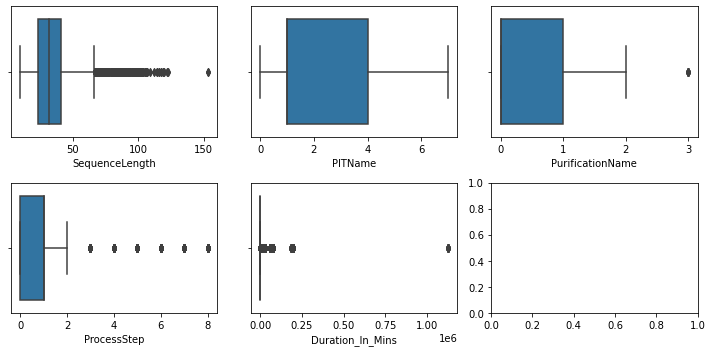

In [4]:
# Outlier Analysis
import matplotlib.pyplot as plt 

fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(df6['SequenceLength'], ax = axs[0,0])
plt2 = sns.boxplot(df6['PITName'], ax = axs[0,1])
plt3 = sns.boxplot(df6['PurificationName'], ax = axs[0,2])
plt1 = sns.boxplot(df6['ProcessStep'], ax = axs[1,0])
plt2 = sns.boxplot(df6['Duration_In_Mins'], ax = axs[1,1])

plt.tight_layout()

In [5]:
import numpy as np

q1, q3 = np.percentile(df6['ProcessStep'], [25, 75])
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
df_Pstep = df6[(df6['ProcessStep'] > lower_bound) & (df6['ProcessStep'] < upper_bound)]

df_Pstep.head()


q1, q3 = np.percentile(df_Pstep['PurificationName'], [25, 75])
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
df_pur = df_Pstep[(df_Pstep['PurificationName'] > lower_bound) & (df_Pstep['PurificationName'] < upper_bound)]

df_pur.head()


q1, q3 = np.percentile(df_pur['PITName'], [25, 75])
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
df_pit = df_pur[(df_pur['PITName'] > lower_bound) & (df_pur['PurificationName'] < upper_bound)]

df_pit.head()


q1, q3 = np.percentile(df_pit['SequenceLength'], [25, 75])
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
df_seqLeg = df_pur[(df_pit['SequenceLength'] > lower_bound) & (df_pit['SequenceLength'] < upper_bound)]

df_seqLeg.head()


q1, q3 = np.percentile(df_seqLeg['Duration_In_Mins'], [25, 75])
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
df_final = df_seqLeg[(df_seqLeg['Duration_In_Mins'] > lower_bound) & (df_seqLeg['Duration_In_Mins'] < upper_bound)]

df_final.head()

,SequenceLength,PITName,PurificationName,ProcessStep,Duration_In_Mins
0,23,0,0,0,368
1,23,0,0,1,17
3,44,0,0,0,368
4,44,0,0,1,17
6,32,0,0,0,368


C:\Users\NikhilN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\NikhilN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\NikhilN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\NikhilN\anaconda

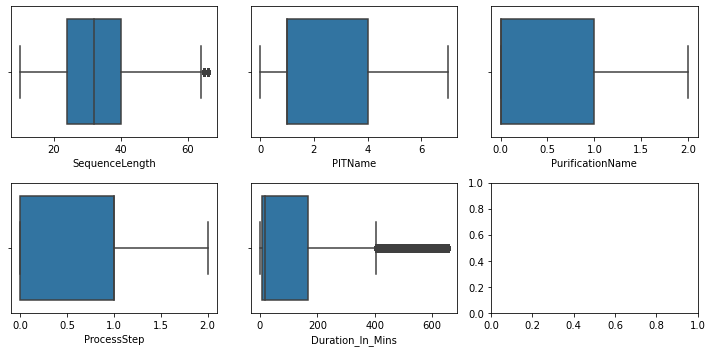

In [6]:
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(df_final['SequenceLength'], ax = axs[0,0])
plt2 = sns.boxplot(df_final['PITName'], ax = axs[0,1])
plt3 = sns.boxplot(df_final['PurificationName'], ax = axs[0,2])
plt1 = sns.boxplot(df_final['ProcessStep'], ax = axs[1,0])
plt2 = sns.boxplot(df_final['Duration_In_Mins'], ax = axs[1,1])

plt.tight_layout()

In [7]:
 df_test = df_final

In [8]:
df_test.count()

SequenceLength      740861
PITName             740861
PurificationName    740861
ProcessStep         740861
Duration_In_Mins    740861
dtype: int64

In [9]:
df_test2 = df_test.drop_duplicates(keep='first')

In [10]:
df_test2.count()

SequenceLength      78775
PITName             78775
PurificationName    78775
ProcessStep         78775
Duration_In_Mins    78775
dtype: int64

C:\Users\NikhilN\AppData\Local\Temp\ipykernel_20212\2936209580.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test2['min_zscore']=np.abs(stats.zscore(df_test2['Duration_In_Mins'])) < 3
C:\Users\NikhilN\AppData\Local\Temp\ipykernel_20212\2936209580.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test2.drop(df_test2['Duration_In_Mins'][df_test2['min_zscore']==False].index, inplace = True)


<AxesSubplot:xlabel='Duration_In_Mins'>

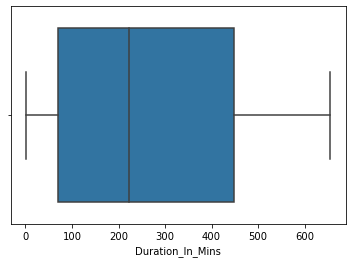

In [11]:
import numpy as np
from scipy import stats

df_test2['min_zscore']=np.abs(stats.zscore(df_test2['Duration_In_Mins'])) < 3
df_test2['Duration_In_Mins'][df_test2['min_zscore']==False]
df_test2.drop(df_test2['Duration_In_Mins'][df_test2['min_zscore']==False].index, inplace = True)
sns.boxplot(x=df_test2['Duration_In_Mins'])

C:\Users\NikhilN\AppData\Local\Temp\ipykernel_20212\1033529002.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test2['min_zscore']=np.abs(stats.zscore(df_test2['SequenceLength'])) < 3
C:\Users\NikhilN\AppData\Local\Temp\ipykernel_20212\1033529002.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test2.drop(df_test2['SequenceLength'][df_test2['min_zscore']==False].index, inplace = True)


<AxesSubplot:xlabel='SequenceLength'>

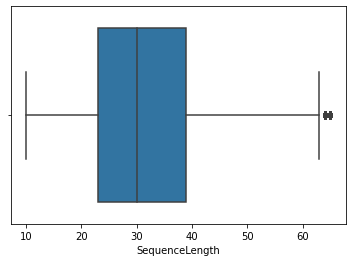

In [12]:
df_test2['min_zscore']=np.abs(stats.zscore(df_test2['SequenceLength'])) < 3
df_test2['SequenceLength'][df_test2['min_zscore']==False]
df_test2.drop(df_test2['SequenceLength'][df_test2['min_zscore']==False].index, inplace = True)
sns.boxplot(x=df_test2['SequenceLength'])

C:\Users\NikhilN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\NikhilN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\NikhilN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\NikhilN\anaconda

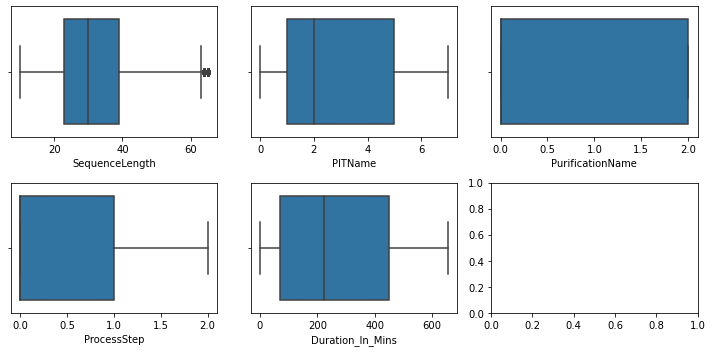

In [13]:
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(df_test2['SequenceLength'], ax = axs[0,0])
plt2 = sns.boxplot(df_test2['PITName'], ax = axs[0,1])
plt3 = sns.boxplot(df_test2['PurificationName'], ax = axs[0,2])
plt1 = sns.boxplot(df_test2['ProcessStep'], ax = axs[1,0])
plt2 = sns.boxplot(df_test2['Duration_In_Mins'], ax = axs[1,1])

plt.tight_layout()

In [14]:
df_test3 = df_test2.drop_duplicates(keep='first')
df_test3.count()

SequenceLength      78750
PITName             78750
PurificationName    78750
ProcessStep         78750
Duration_In_Mins    78750
min_zscore          78750
dtype: int64

In [15]:
df_test3.drop(['min_zscore'],inplace=True,axis=1)

In [16]:
df_test4 = df_test3.drop_duplicates(keep='first')


In [17]:
df_test4.count()

SequenceLength      78750
PITName             78750
PurificationName    78750
ProcessStep         78750
Duration_In_Mins    78750
dtype: int64

In [24]:
df_test4.to_csv(r"C:\Users\NikhilN\Downloads\Hackathon\Final\DONE\Analysis_Final_V1.csv",index=False)

In [19]:
ddf_Final =pd.read_csv(r'C:\Users\NikhilN\Downloads\Hackathon\Final\DONE\Analysis_Final_V1.csv', low_memory=False)

In [20]:
ddf_Final

,Unnamed: 0,SequenceLength,PITName,PurificationName,ProcessStep,Duration_In_Mins
0,0,23,0,0,0,368
1,1,23,0,0,1,17
2,3,44,0,0,0,368
3,4,44,0,0,1,17
4,6,32,0,0,0,368
...,...,...,...,...,...,...
78745,1491319,24,4,1,0,197
78746,1491325,23,4,1,0,197
78747,1491343,32,4,1,0,197
78748,1491349,35,6,1,0,197


In [21]:
ddf_Final.count()

Unnamed: 0          78750
SequenceLength      78750
PITName             78750
PurificationName    78750
ProcessStep         78750
Duration_In_Mins    78750
dtype: int64

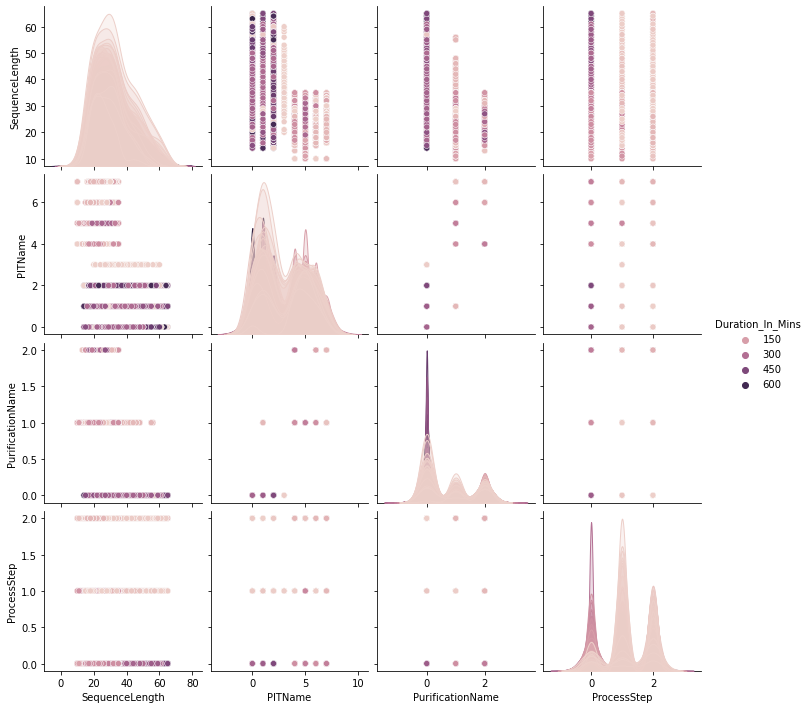

In [23]:
sns.pairplot(ddf_Final,vars = ['SequenceLength','PITName','PurificationName','ProcessStep'], hue="Duration_In_Mins")